In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

from sklearn import ensemble
from matplotlib import style
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

style.use('fivethirtyeight')
%matplotlib inline

In [5]:
test_path = 'test.csv'
train_path = 'train.csv'

X_test = pd.read_csv(test_path)
X = pd.read_csv(train_path)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

/home/alan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


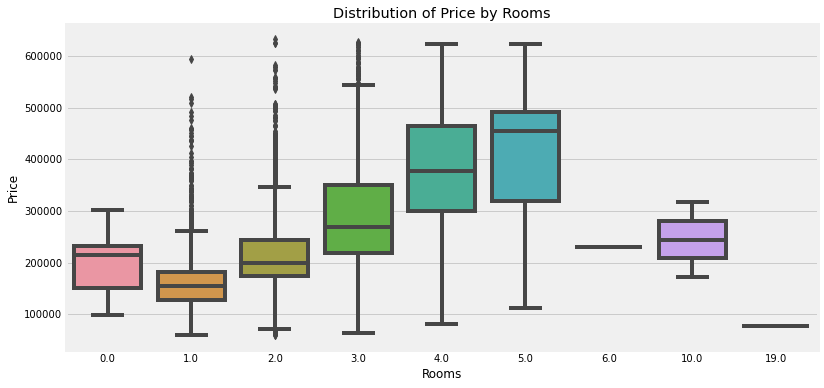

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(X['Rooms'], X['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Distribution of Price by Rooms')
plt.show()

<AxesSubplot:xlabel='Square', ylabel='Price'>

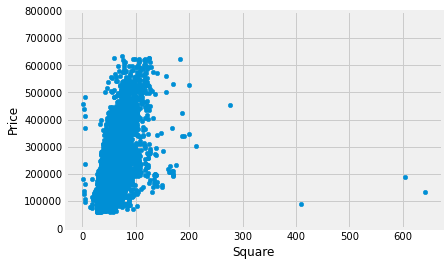

In [7]:
var = 'Square'
data = pd.concat([X['Price'], X[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000))

<AxesSubplot:xlabel='LifeSquare', ylabel='Price'>

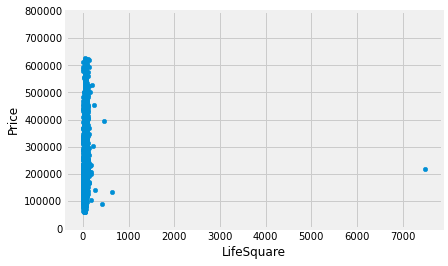

In [8]:
var = 'LifeSquare'
data = pd.concat([X['Price'], X[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000))

In [9]:
X['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [10]:
X['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [11]:
(X['Floor'] > X['HouseFloor']).sum()

1825

In [12]:
X['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>],
       [<AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>],
       [<AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

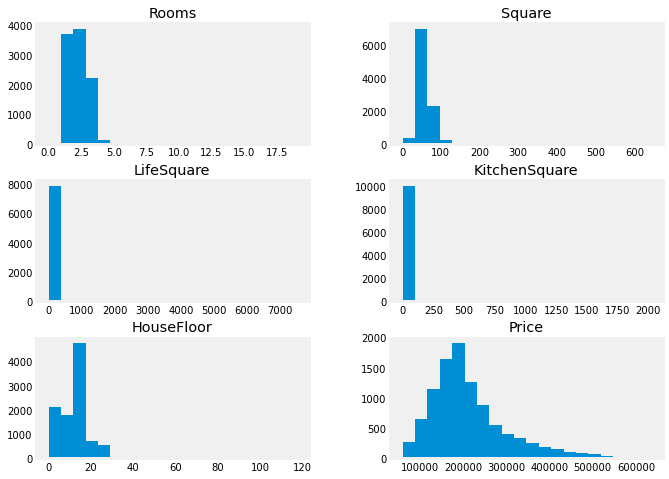

In [13]:
# отбираем количественные признаки
df_num_features = X.select_dtypes(include='float64')

# Удаляем малозначащие столбцы
num_features = pd.DataFrame(df_num_features)
num_features.drop("Ecology_1", axis=1, inplace=True)
num_features.drop("Healthcare_1", axis=1, inplace=True)
num_features.hist(figsize=(10, 8), bins=20, grid=False)

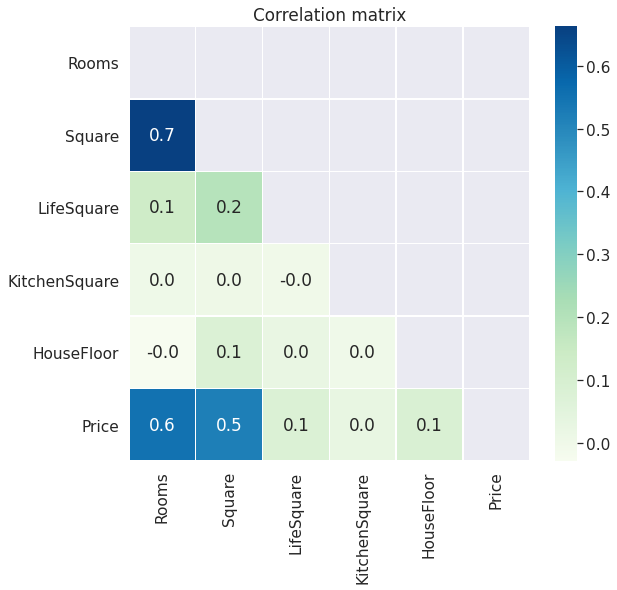

In [14]:
corr = num_features.corr()
plt.figure(figsize = (8, 8))
mask = np.zeros_like(corr, dtype=np.bool)  # отрезаем лишнюю половину матрицы
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)
sns.heatmap(num_features.corr(), mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()

In [15]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [16]:
X = X.sort_values('Price')
X_final = X_final.sort_values('DistrictId')

In [17]:
# Удаляем выбросы Square
X.sort_values(by = 'Square', ascending = False)[:3]
X = X.drop(X[X['Id'] == 11602].index)
X = X.drop(X[X['Id'] == 28].index)
X = X.drop(X[X['Id'] == 2307].index)

In [18]:

X.sort_values(by = 'HouseYear', ascending = False)[:2]
X = X.drop(X[X['Id'] == 10814].index)
X = X.drop(X[X['Id'] == 11607].index)

In [19]:

X.sort_values(by = 'Rooms', ascending = False)[:3]
X = X.drop(X[X['Id'] == 8491].index)
X = X.drop(X[X['Id'] == 5927].index)
X = X.drop(X[X['Id'] == 14865].index)

In [20]:
# Удаляем выбросы LifeSquare

X.sort_values(by = 'LifeSquare', ascending = False)[:4]
X = X.drop(X[X['Id'] == 16550].index)
X = X.drop(X[X['Id'] == 15886].index)
X = X.drop(X[X['Id'] == 14990].index)
X = X.drop(X[X['Id'] == 5548].index)
X = X.drop(X[X['Id'] == 7917].index)
X = X.drop(X[X['Id'] == 16568].index)

In [21]:
# Создаем класс для подчищения выбросов


class FeatureImputer:
    """Заполнение пропусков и обработка выбросов"""
    
    def __init__(self):
        self.medians=None
        
    def fit(self, X):
        self.medians = X.median()
    
    def transform(self, X):
        
        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms'] 
        X.loc[(X['Rooms'] > 5) & (X['Square'] < 50),'Rooms'] = 2
        
        # Square
        X.loc[X['Square'] < 10,'Square']= X.loc[X['Square'] < 10,'Square']*10
        X.loc[X['Square'] < 1,'Square'] = X.loc[X['Square']<1,'Square']*100 
        X.loc[X['Square'] > 250, 'Square'] = self.medians['Square'] 
        
        # KitchenSquare
        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        X.loc[X['KitchenSquare'] > 1000, 'KitchenSquare'] = self.medians['KitchenSquare']
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor']
        
        # HouseYear
        current_year = now = datetime.datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = self.medians['HouseYear']
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        
        X.loc[(X['LifeSquare'] > 200) &\
               (X['Square'] < 100),'LifeSquare']=X.loc[(X['LifeSquare']>200) & (X['Square']<100),'LifeSquare']/10
        
        condition = (X['LifeSquare'].isna()) &\
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] * 0.65
        
        
        return X

In [22]:
imputer = FeatureImputer()

imputer.fit(X) # расчет медиан

X = imputer.transform(X)
X_final = imputer.transform(X_final)

In [23]:

X = X.sort_values('Price')
X_final = X_final.sort_values('DistrictId')
X = X.fillna(method='pad')
X_final = X_final.fillna(method='pad')

In [24]:
y = X.Price
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)

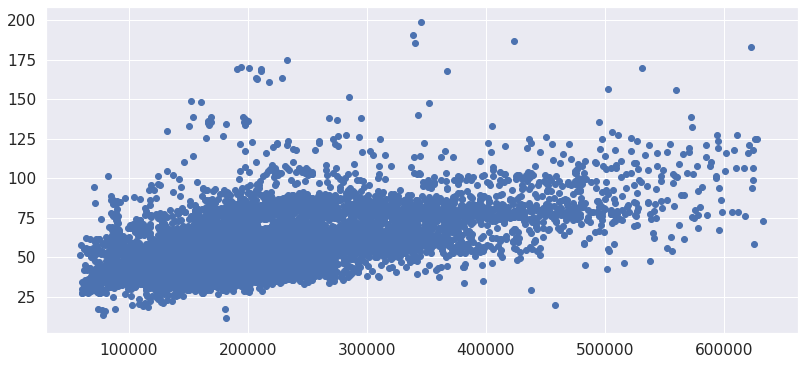

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

plt.scatter(y, X.Square)

In [26]:
X = pd.get_dummies(X)

In [27]:
model1 = ensemble.GradientBoostingRegressor(n_estimators=300, max_depth=6, min_samples_split=2,
                                           learning_rate=0.1, loss='ls', random_state=42)
cv_score = cross_val_score(model1, X, y, 
                           scoring='r2', 
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

print('R2: {:.3f} +- {:.3f}'.format(mean, std))

R2: 0.740 +- 0.019


In [29]:
model2 = RandomForestRegressor(n_estimators=330, max_depth=100, random_state=42, max_features=15)

cv_score = cross_val_score(model2, X, y, 
                           scoring='r2', 
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

print('R2: {:.3f} +- {:.3f}'.format(mean, std))

R2: 0.737 +- 0.018


In [30]:
model = VotingRegressor([('model1', model1), ('model2', model2)])

In [31]:
cv_score = cross_val_score(model, X, y, 
                           scoring='r2', 
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))
# cv_score
mean = cv_score.mean()
std = cv_score.std()

print('R2: {:.3f} +- {:.3f}'.format(mean, std))

R2: 0.749 +- 0.017


In [36]:
model.fit(X, y)

VotingRegressor(estimators=[('model1',
                             GradientBoostingRegressor(max_depth=6,
                                                       n_estimators=300,
                                                       random_state=42)),
                            ('model2',
                             RandomForestRegressor(max_depth=18, max_features=7,
                                                   n_estimators=300,
                                                   random_state=42))])

In [37]:
X_test = pd.get_dummies(X_final)
X_test.drop("Id", axis=1, inplace=True)



X_final["Price"] = model.predict(X_test)
X_final.loc[:, ['Id', 'Price']].to_csv('predictionsVR.csv', index=False)
X_final.loc[:, ['Id', 'Price']].head(20)

,Id,Price
4561,4836,253523.069885
2546,14681,221758.213401
4821,4475,155299.144744
2474,14316,174572.568174
1015,6663,184851.262269
4706,9924,231669.620942
3355,4135,104585.124600
3520,6661,112307.647569
2006,9778,135722.829889
37,4176,183270.588218
